# MOVIE SUCCESS PREDICTION - 📦 Data provisioning

- ============================================================================
# 🛠️SETUP / Data Collection
- ============================================================================

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 🎯DATA REQUIREMENTS


- Business Objective
- Predict movie success categories (Hit/Break-even/Flop) using industry-standard 2.5x revenue-to-budget ratio threshold.

- Required Features
* `Financial: Budget, revenue for profit calculations and target variable creation`
* `Content: Genre, runtime, release timing to capture audience preferences and market conditions`
* `People: Director, cast, studio reputation for talent-based success indicators`
* `Validation: IMDb ratings, awards for external quality assessment`

# 📃 Data Understanding

In [2]:
df = pd.read_csv("movie_dataset_INTEGRATED_2969_movies_20250925_213036.csv")

# Dynamic variables
N_MOVIES = len(df)
N_FEATURES = len(df.columns)
NUMERICAL_FEATURES = ['budget', 'revenue', 'runtime', 'vote_average', 'imdb_rating', 'profit_ratio']
OPTIMAL_BINS = min(max(15, int(np.sqrt(N_MOVIES))), 25)

from styles.variablesforStyling import IBCS_COLORS, set_light_theme, ibcs_bars
set_light_theme()

print(f"Dataset: {N_MOVIES} movies with {N_FEATURES} features")
print(f"Success distribution:\n{df['success_category'].value_counts()}")

Dataset: 2969 movies with 53 features
Success distribution:
success_category
Hit           1505
Break-even     846
Flop           618
Name: count, dtype: int64


#

- ============================================================================
- VISUALIZATION 1: Investment Success Factors
- ============================================================================

- `Question: What are the distribution patterns of our key predictive features?`

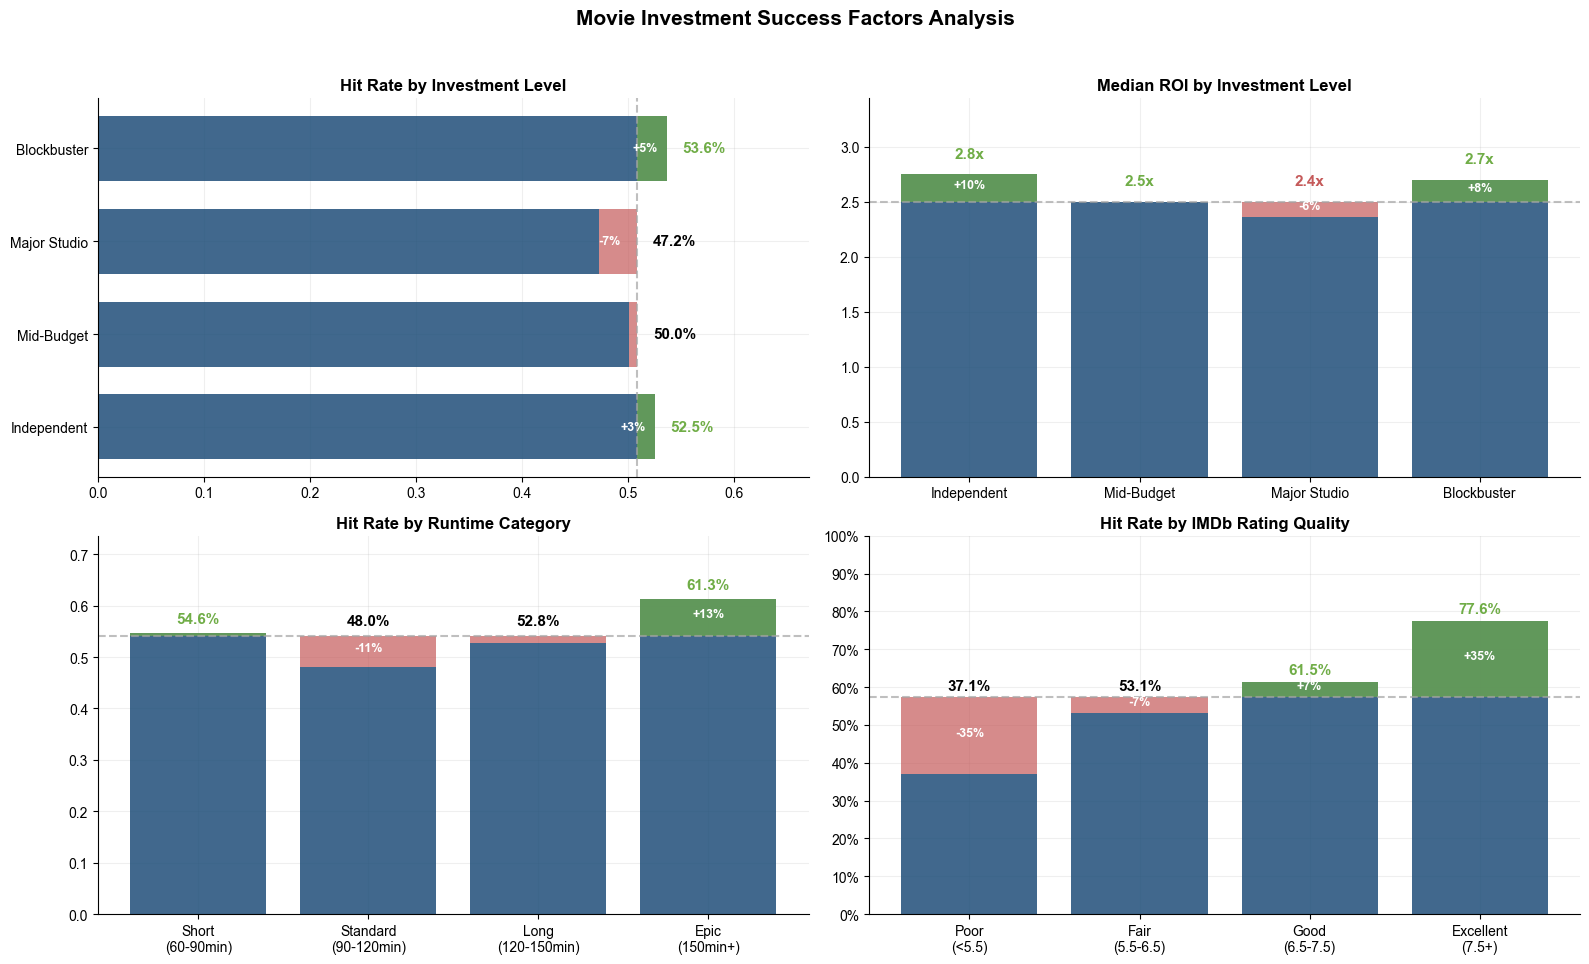

## Investment Success Insights:
- **Budget level performance**: Independent and blockbuster films show highest hit rates
- **ROI efficiency**: Mid-budget films often deliver better return ratios than blockbusters
- **Runtime optimization**: Epic films (150min+) perform best, short films struggle
- **Quality correlation**: Excellent IMDb ratings strongly predict commercial success


In [3]:
from styles.visualization_1 import create_investment_factors_analysis
create_investment_factors_analysis(df, IBCS_COLORS)

- ============================================================================
- VISUALIZATION 2: Genre Performance Analysis
- ============================================================================

- Understanding relationship between genre and success

- `Question: Which genres consistently deliver better financial returns?`

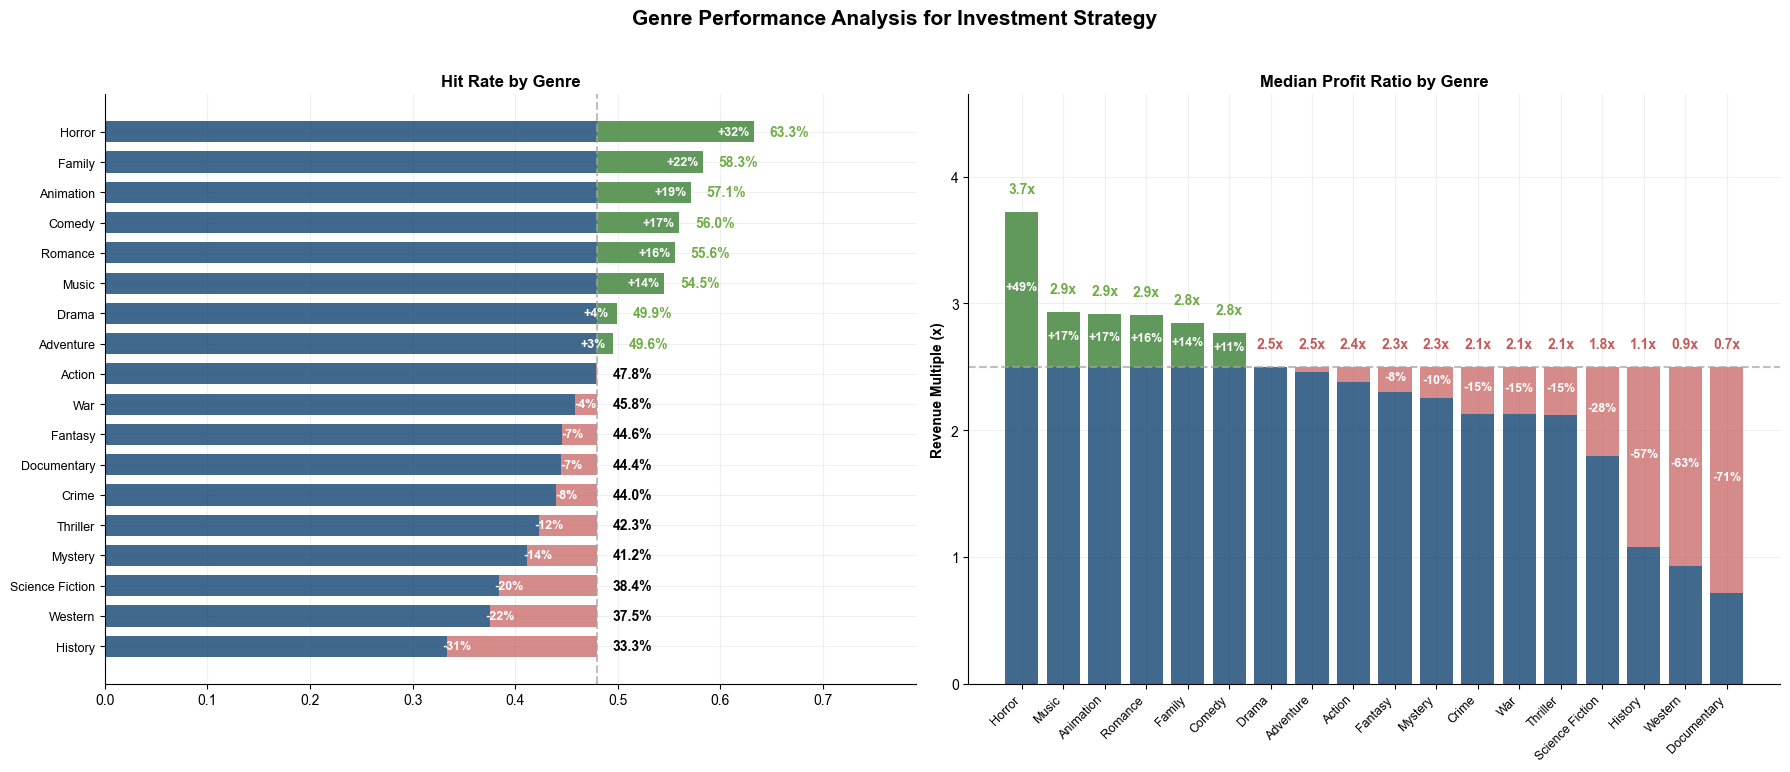

## Genre Performance Insights:
- **Genre Hit Rate Average**: 48.0% across 18 movie genres
- **Industry Profit Threshold**: 2.5x revenue multiple (movies below this are not profitable)
- **High-performing genres**: Horror, Family, Animation (above average hit rates)
- **Low-performing genres**: History, Western, Science Fiction (below average hit rates)


In [4]:
from styles.visualization_2 import create_genre_performance_analysis
create_genre_performance_analysis(df, IBCS_COLORS)

- ============================================================================
- VISUALIZATION 3: Budget vs Revenue Relationship 
- ============================================================================
- Core relationship for success prediction
- Question: How does budget relate to revenue across success categories?
- `I want to see how director experience and past success predict future movie performance`

c:\Users\Anton\Documents\FONTYS\Sem 4\Project\Data for python\Project\Data Provisioning\styles\visualization_3.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = clean_data.groupby(budget_bins).agg({


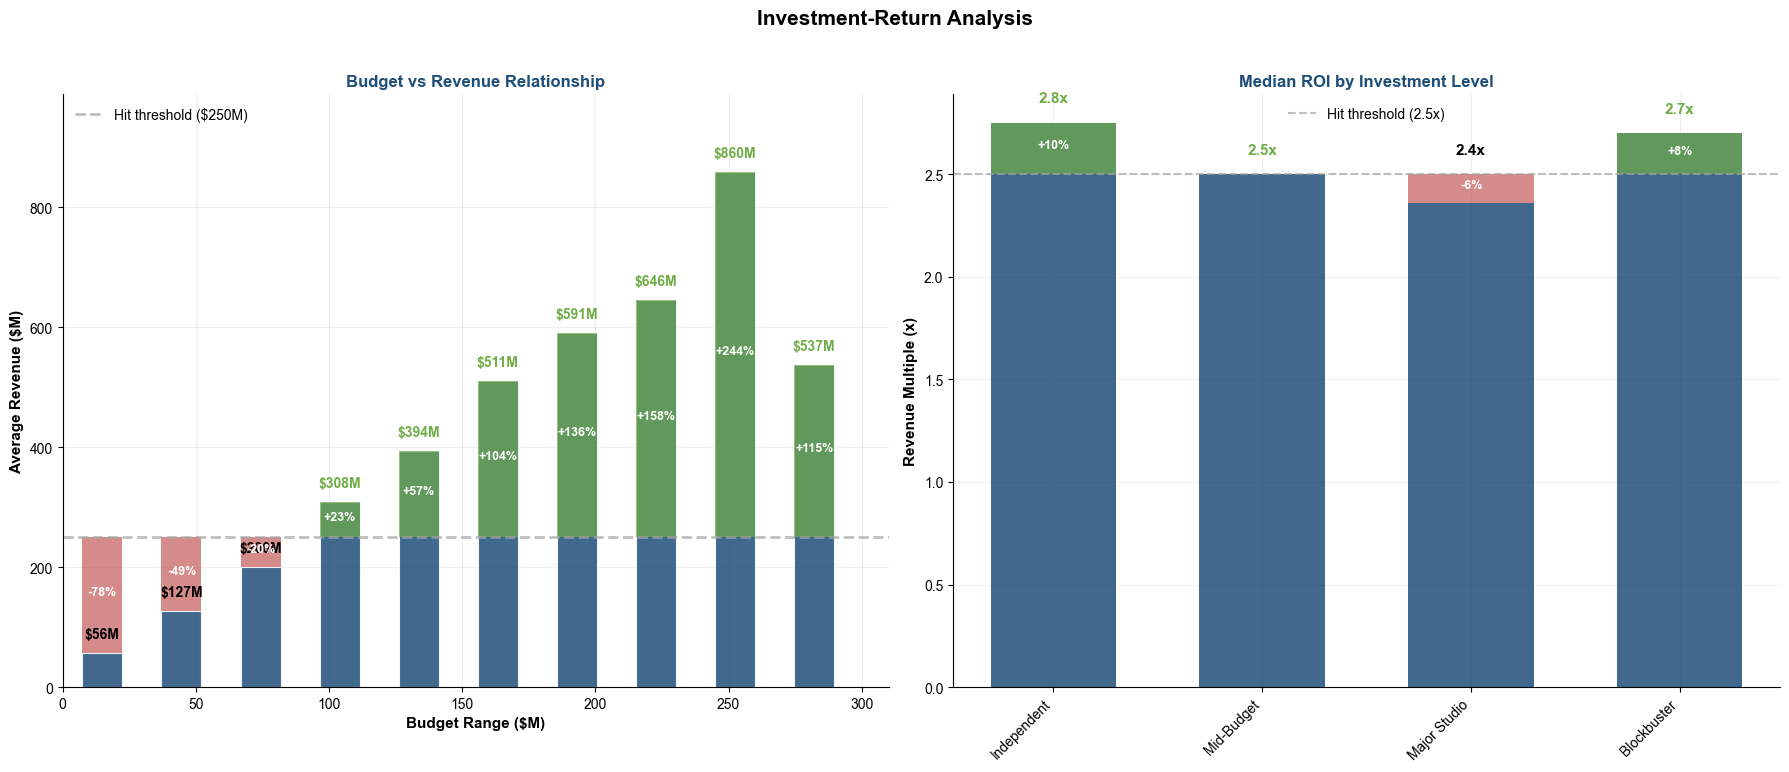

## Investment-Return Insights:
- **Budget efficiency**: Higher budgets don't automatically guarantee better returns
- **Profitability zones**: Clear separation between profitable and unprofitable investments
- **Investment sweet spot**: Mid-budget films often show better ROI ratios
- **Risk scaling**: Revenue variance increases with budget size


In [21]:
from styles.visualization_3 import create_budget_revenue_analysis
create_budget_revenue_analysis(df, IBCS_COLORS)

- ============================================================================
- VISUALIZATION 4: Seasonal Release Pattern Analysis 
- ============================================================================
- Analyze seasonal release patterns
- `Question: Do certain release months or seasons produce more hits?`

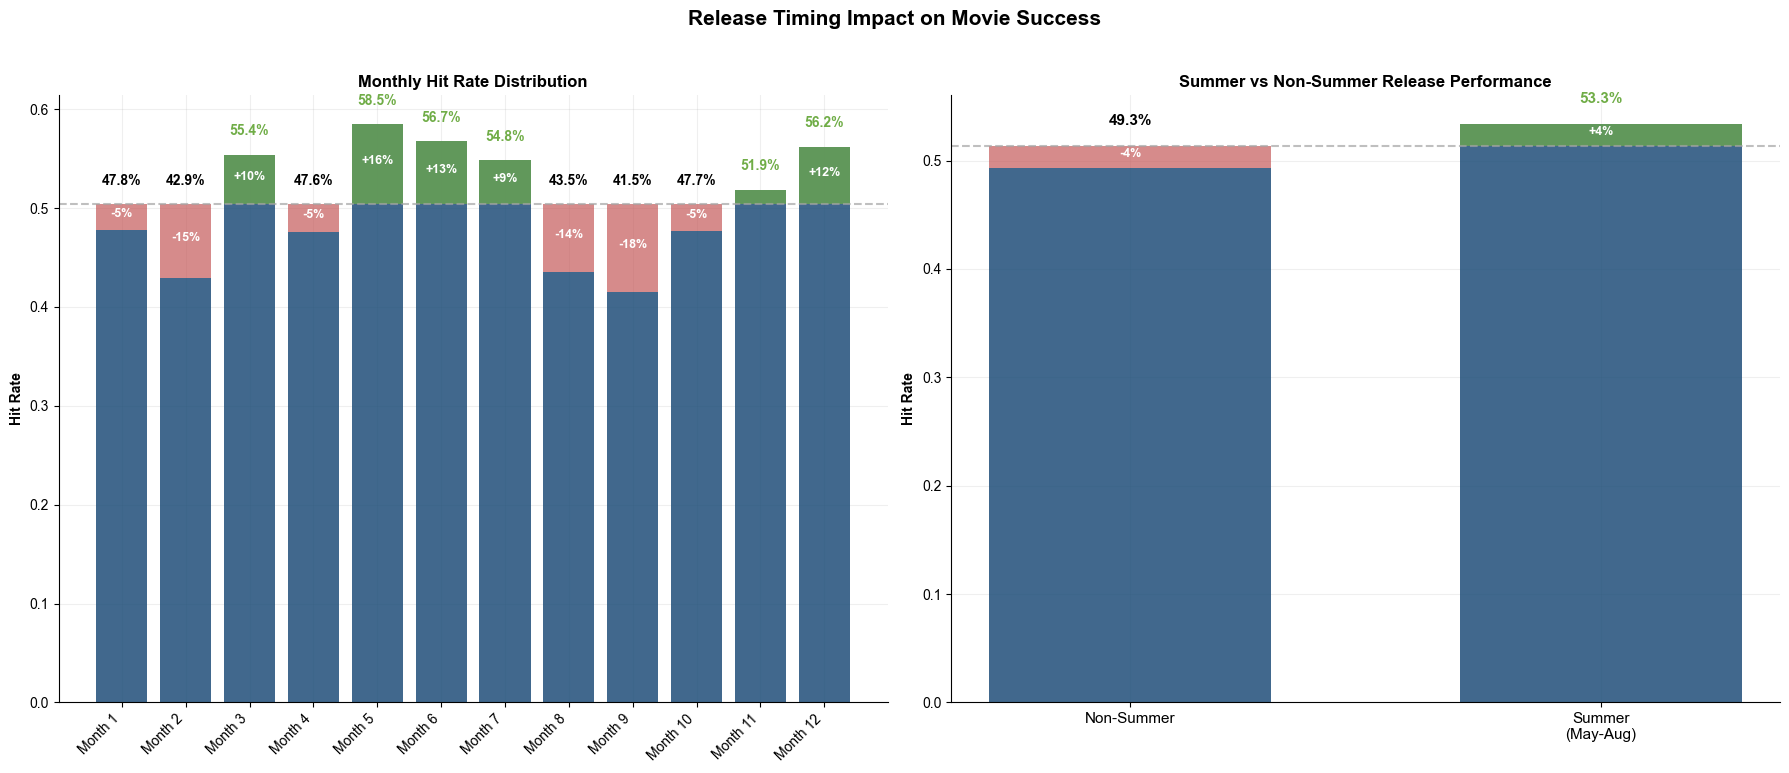

## Release Timing Insights:
- **Monthly average hit rate**: 50.4% across all release months
- **Summer blockbuster effect**: May-August typically show higher success rates
- **Strategic release windows**: Studios avoid 'dump months' like January/February
- **Holiday competition**: December shows mixed results due to high competition


In [6]:
from styles.visualization_4 import create_seasonal_release_analysis
create_seasonal_release_analysis(df, IBCS_COLORS)

- ============================================================================
- VISUALIZATION 5: Director Track Record Analysis
- ============================================================================
- Analyze director success patterns for talent evaluation
- `Question: Do experienced directors consistently deliver better results?`

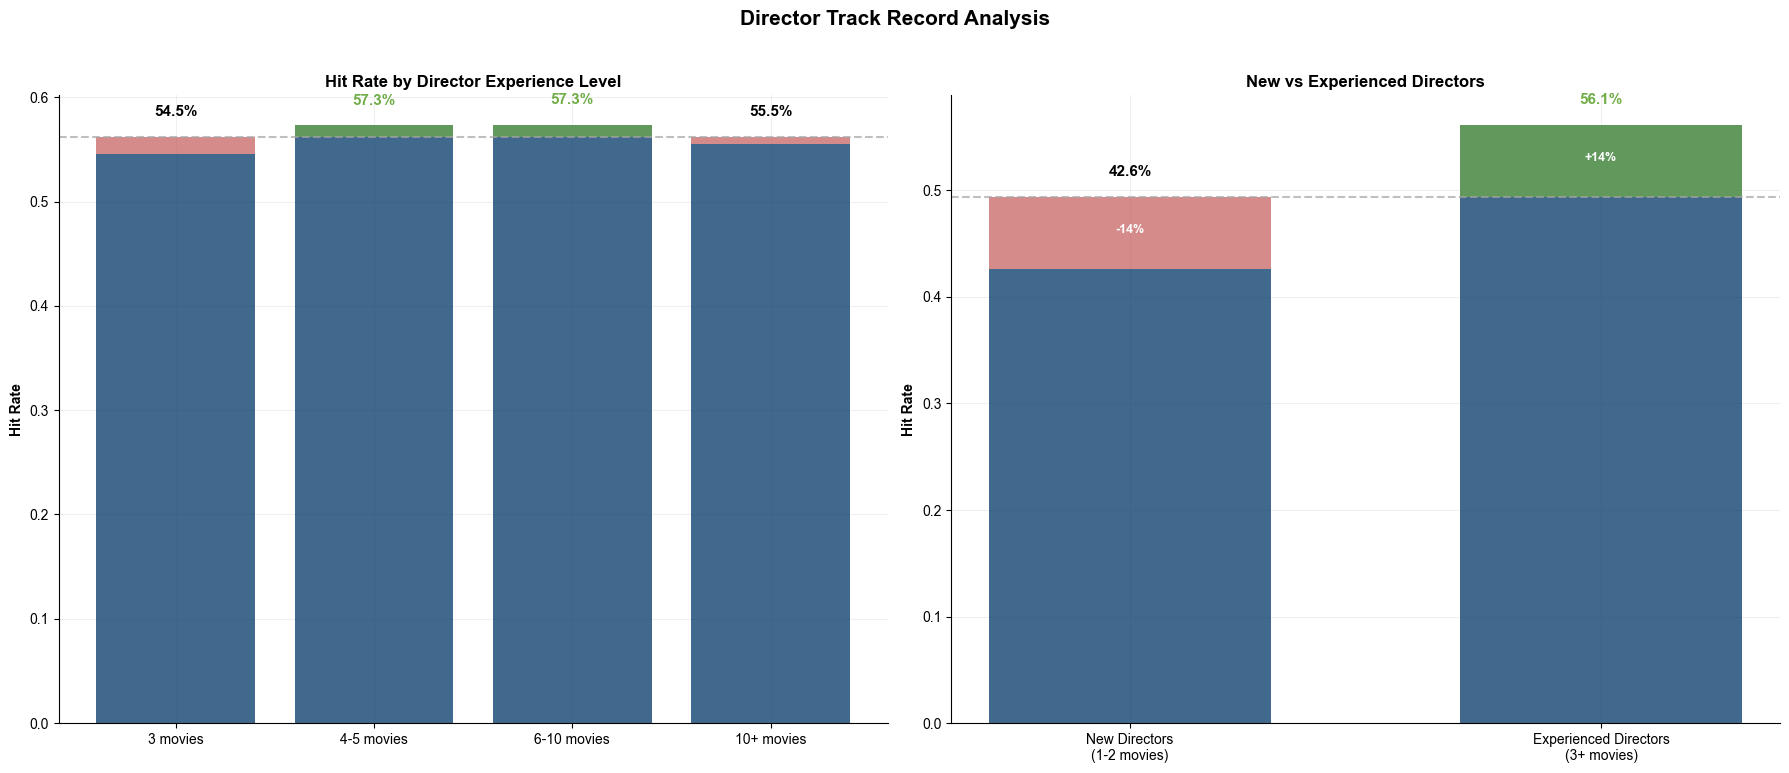

## Director Experience Insights:
- **Experience correlation**: Directors with 6+ movies show higher hit rates
- **New director risk**: Directors with 1-2 movies have higher uncertainty
- **Track record value**: Experience level is a strong predictor for investment decisions
- **Talent identification**: Consistent performers can be identified after 3+ movies


In [7]:
from styles.visualization_5 import create_director_track_record_analysis
create_director_track_record_analysis(df, IBCS_COLORS)

- ============================================================================
- VISUALIZATION 6: Studio Performance Analysis
- ============================================================================
- Studio power and distribution network impact
- `Question: Which major studios consistently deliver the highest success rates?`

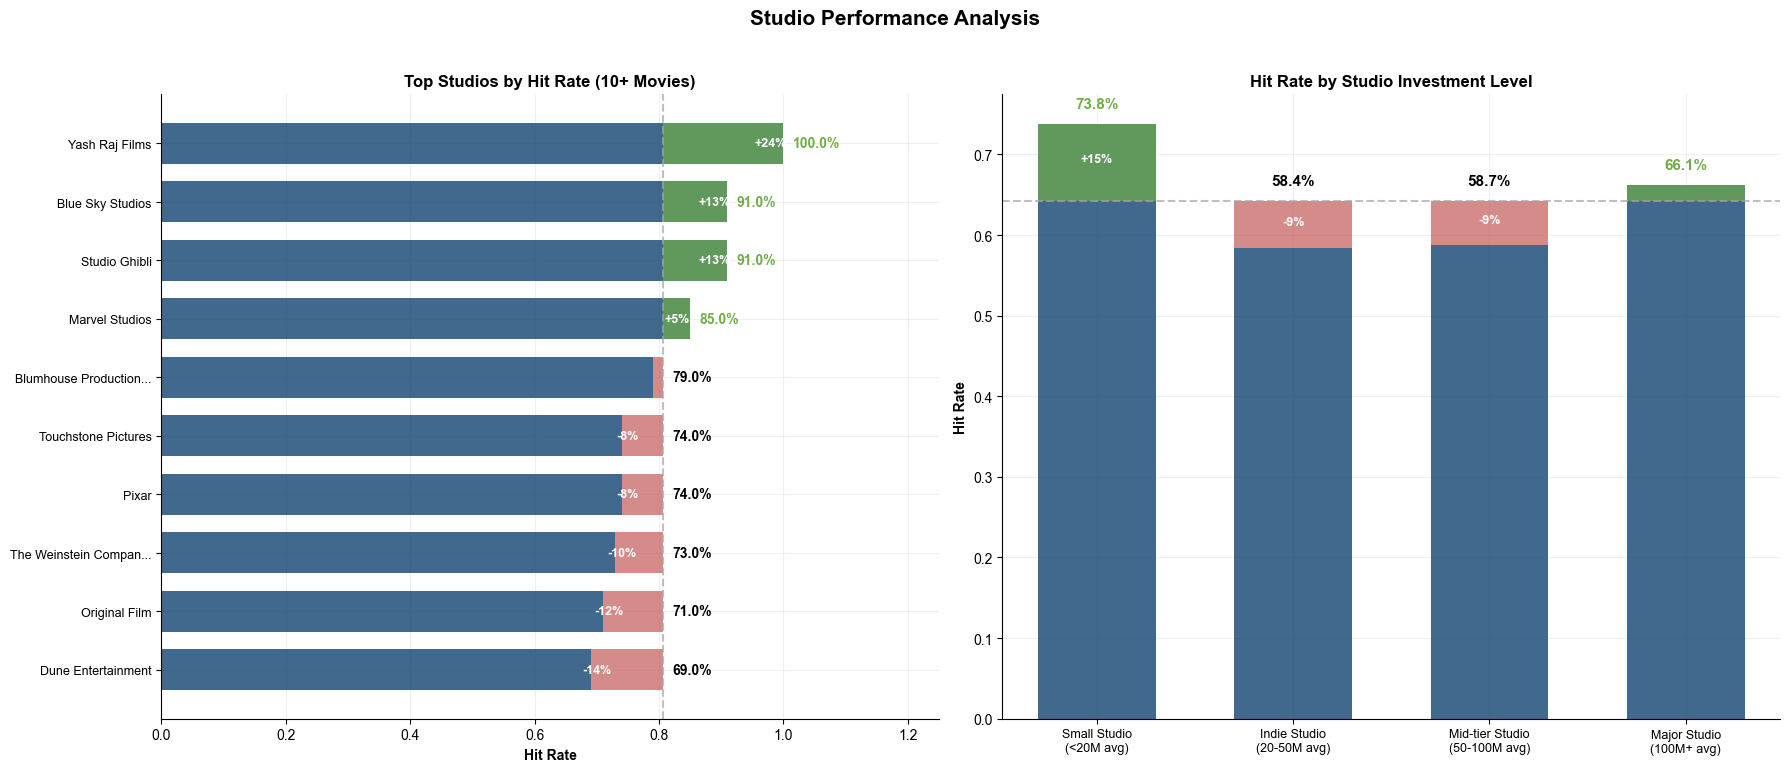

## Studio Performance Insights:
- **Top studio benchmark**: Top performers show consistent hit rates
- **Studio size correlation**: Larger budget studios don't always guarantee higher success rates
- **Distribution network value**: Major studios provide marketing and distribution advantages
- **Partnership strategy**: Track record more important than studio size for investment decisions


In [8]:
from styles.visualization_6 import create_studio_performance_analysis
create_studio_performance_analysis(df, IBCS_COLORS)

- ============================================================================
- VISUALIZATION 7: Lead Actor Influence Analysis
- ============================================================================
- Lead actor influence on box office performance
- `Question: How does star power translate to commercial success and revenue?`

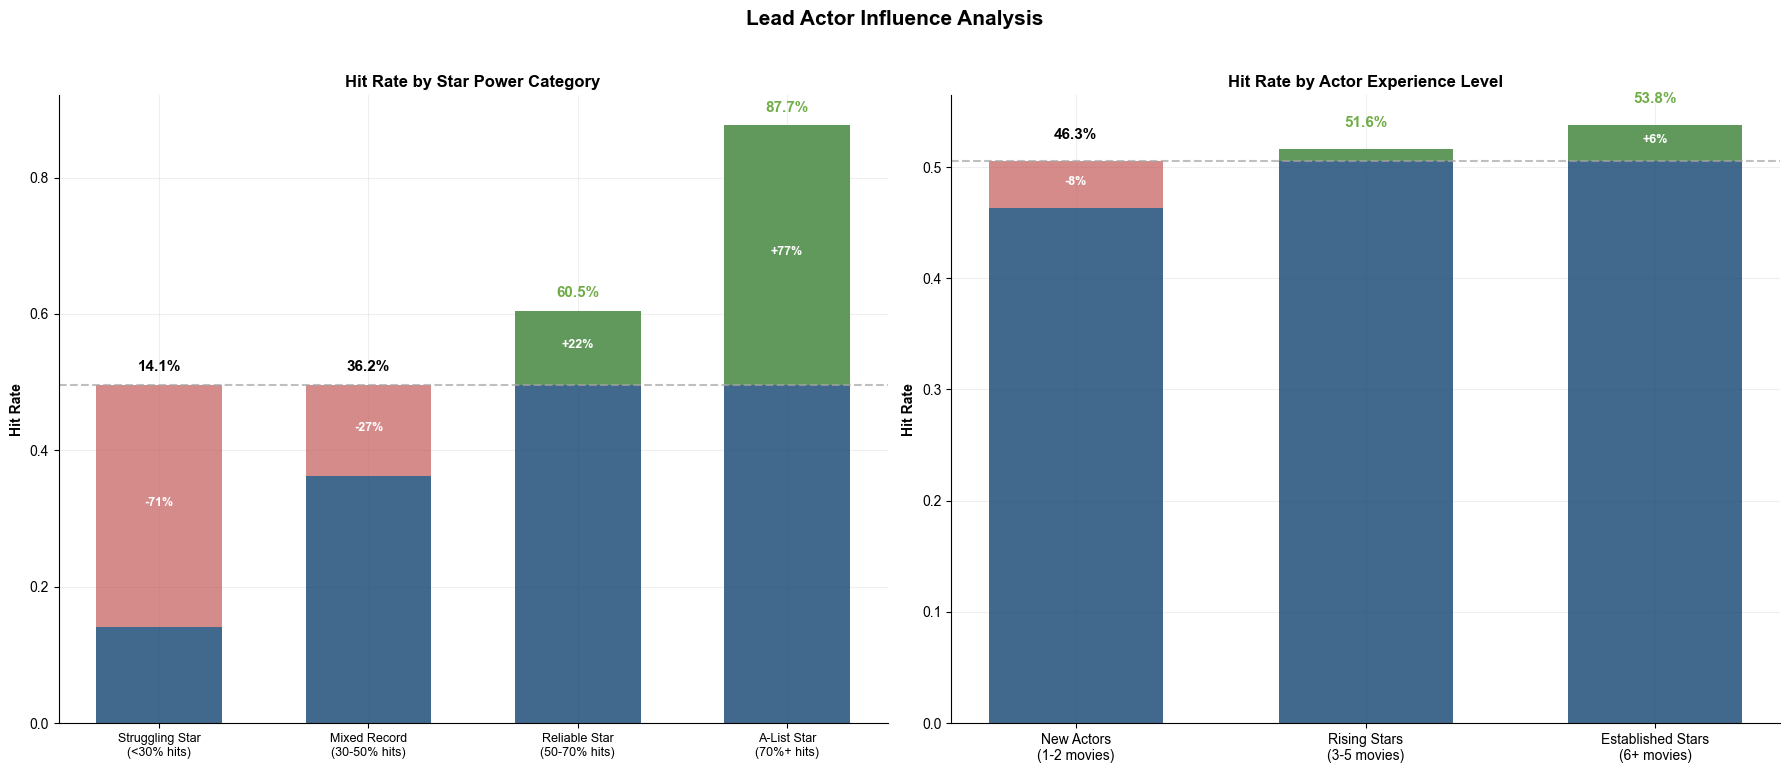

## Lead Actor Influence Insights:
- **Star power impact**: A-list actors show consistently higher hit rates
- **Experience correlation**: Established stars (6+ movies) outperform newcomers
- **Casting strategy**: Track record more predictive than name recognition alone
- **Risk assessment**: New actors represent higher uncertainty in success prediction


In [9]:
from styles.visualization_7 import create_lead_actor_influence_analysis
create_lead_actor_influence_analysis(df, IBCS_COLORS)

# ============================================================================
# 💡 DATA PREPARATION PHASE
# ============================================================================

- I need to assess data quality before modeling to identify potential issues


In [10]:
print("\n" + "="*60)
print("DATA PREPARATION PHASE")
print("="*60)

# I'm checking for missing values because they can break machine learning algorithms
print("\nMissing values analysis:")
missing_values = df.isnull().sum()
missing_report = missing_values[missing_values > 0]
if not missing_report.empty:
    print(missing_report)
else:
    print("No missing values found in dataset")


DATA PREPARATION PHASE

Missing values analysis:
overview                      1
primary_genre                 1
main_production_company       7
main_production_country       5
lead_actor                    1
lead_actor_id                 1
imdb_rating                2009
imdb_votes                 2006
rotten_tomatoes_score      2046
metacritic_score           2056
awards                     2049
writer                     2011
rated                      2025
country                    2001
dtype: int64


- I need to verify data integrity to ensure reliable model training

In [11]:
print("\nData quality assessment:")
zero_budget = (df['budget'] == 0).sum()
zero_revenue = (df['revenue'] == 0).sum()
invalid_ratios = (df['profit_ratio'] < 0).sum()

print(f"Movies with zero budget: {zero_budget}")
print(f"Movies with zero revenue: {zero_revenue}")
print(f"Invalid profit ratios: {invalid_ratios}")


Data quality assessment:
Movies with zero budget: 0
Movies with zero revenue: 0
Invalid profit ratios: 0


- I'm checking feature ranges because algorithms like k-NN need scaled features


In [12]:
print("\nFeature scaling assessment:")
scaling_features = ['budget', 'revenue', 'runtime', 'vote_average', 'imdb_rating']
for feature in scaling_features:
    min_val = df[feature].min()
    max_val = df[feature].max()
    print(f"{feature}: {min_val:,.0f} - {max_val:,.0f}")


Feature scaling assessment:
budget: 4 - 583,900,000
revenue: 1 - 2,923,706,026
runtime: 0 - 233
vote_average: 0 - 10
imdb_rating: 4 - 9


- I'm creating new features to improve model performance and capture patterns

In [13]:
print("\nFeature engineering:")
df['budget_log'] = np.log1p(df['budget'])
df['revenue_log'] = np.log1p(df['revenue'])
df['vote_popularity_ratio'] = df['vote_average'] / (df['vote_count'] + 1)
df['rating_spread'] = abs(df['imdb_rating'] - df['vote_average'])
print("Log transformations applied to financial features")
print("Vote popularity ratio calculated")
print("Rating spread feature created")


Feature engineering:
Log transformations applied to financial features
Vote popularity ratio calculated
Rating spread feature created


- I need to encode categorical variables because ML algorithms only work with numbers

In [14]:
from sklearn.preprocessing import LabelEncoder
categorical_features = ['primary_genre', 'budget_category', 'main_production_company']

for feature in categorical_features:
    if feature in df.columns:
        le = LabelEncoder()
        df[f'{feature}_encoded'] = le.fit_transform(df[feature].fillna('Unknown'))

print("Categorical variables encoded for modeling")

Categorical variables encoded for modeling


- I'm selecting the final feature set based on EDA insights and model requirements

In [15]:
modeling_features = [
    'budget_log', 'runtime', 'vote_average', 'imdb_rating', 'rotten_tomatoes_score',
    'genre_count', 'is_summer_movie', 'is_holiday_movie', 'is_us_movie', 
    'has_awards', 'primary_genre_encoded', 'budget_category_encoded'
]

- I need to document the final dataset to confirm it's ready for modeling

In [16]:
print("\n" + "-"*50)
print("FINAL MODELING DATASET SUMMARY")
print("-"*50)
print(f"Total movies: {len(df):,}")
print(f"Features for modeling: {len(modeling_features)}")


--------------------------------------------------
FINAL MODELING DATASET SUMMARY
--------------------------------------------------
Total movies: 2,969
Features for modeling: 12


- I'm checking target distribution to identify potential class imbalance issues

In [17]:
print(f"Target variable distribution:")
target_dist = df['success_category'].value_counts(normalize=True)
for category, proportion in target_dist.items():
    print(f"  {category}: {proportion:.1%}")

Target variable distribution:
  Hit: 50.7%
  Break-even: 28.5%
  Flop: 20.8%


- I want to verify which features correlate strongest with success


In [18]:
if 'profit_ratio' in df.columns:
    available_features = [f for f in modeling_features if f in df.columns]
    feature_target_corr = df[available_features + ['profit_ratio']].corr()['profit_ratio'].abs().sort_values(ascending=False)
    
    print(f"\nStrongest feature correlations with profit ratio:")
    top_correlations = feature_target_corr.head(5)
    for feature, correlation in top_correlations.items():
        if feature != 'profit_ratio':
            print(f"  {feature}: {correlation:.3f}")


Strongest feature correlations with profit ratio:
  imdb_rating: 0.172
  rotten_tomatoes_score: 0.154
  budget_log: 0.123
  runtime: 0.031


- I'm documenting completion to confirm readiness for the next phase

In [19]:
print("\n" + "="*60)
print("DATA PROVISIONING PHASE COMPLETE")
print("="*60)
print("The movie dataset is ready for machine learning modeling.")


DATA PROVISIONING PHASE COMPLETE
The movie dataset is ready for machine learning modeling.


- I need to save the prepared dataset for the modeling phase


In [20]:
output_filename = 'movie_dataset_modeling_ready.csv'
df.to_csv(output_filename, index=False)
print(f"\n✓ Dataset saved: {output_filename}")



✓ Dataset saved: movie_dataset_modeling_ready.csv
